In [1]:
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split, cross_val_predict 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier



In [2]:
df = pd.read_parquet(r"All_Relative_Results_Cleaned.parquet")


In [3]:
df_clean = df.dropna()
index = df_clean.columns.get_loc('time(s)')
df_right = df_clean.iloc[:, index+1:]
X = df_right
Y = df_clean['Exercise']


In [4]:
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)


In [5]:
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(Y_encoded, dtype=torch.long)


In [6]:
# Assuming X is your features and y is your labels
X_train, X_temp, y_train, y_temp = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Split the temp set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

train_dataset = TensorDataset(X_train,y_train)
test_dataset = TensorDataset(X_test,y_test)
trainLoader = DataLoader(train_dataset, batch_size=32, shuffle=True)
testLoader = DataLoader(test_dataset, batch_size=32 , shuffle=True)

In [7]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=30, random_state=10)

# Perform cross-validation
y_pred_cv = cross_val_predict(rf_classifier, X_train, y_train, cv=5)



In [ ]:
# Evaluate accuracy on the cross validation set
accuracy_train = accuracy_score(y_train, y_pred_cv)
print(f'Accuracy on the train set: {accuracy_train:.5f}')


Accuracy on the test set: 0.98588


In [ ]:
# Train the Random Forest model on the entire training set
rf_classifier.fit(X_train, y_train)



RandomForestClassifier(n_estimators=5, random_state=10)

In [ ]:
# Make predictions on the test set
y_pred_test = rf_classifier.predict(X_test)



In [ ]:
# Evaluate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Accuracy on the test set: {accuracy_test:.5f}')


Accuracy on the test set: 0.98807


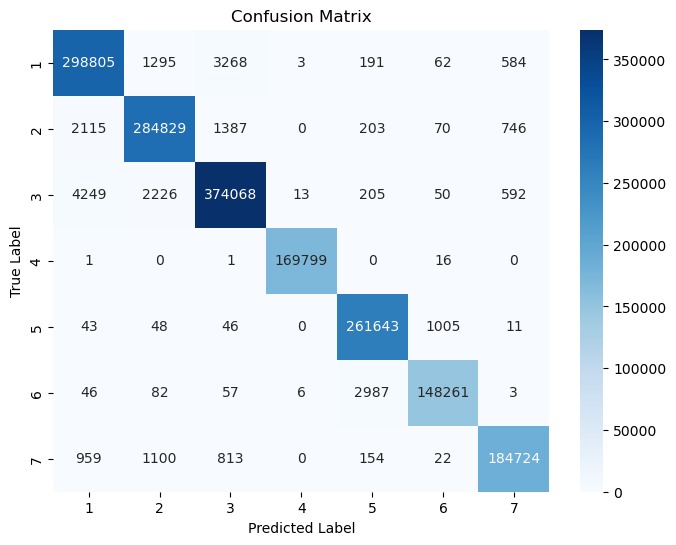

In [ ]:

# Visualize the confusion matrix of the train after cross validation
conf_matrix = confusion_matrix(y_train, y_pred_cv)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 8), yticklabels=range(1, 8))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

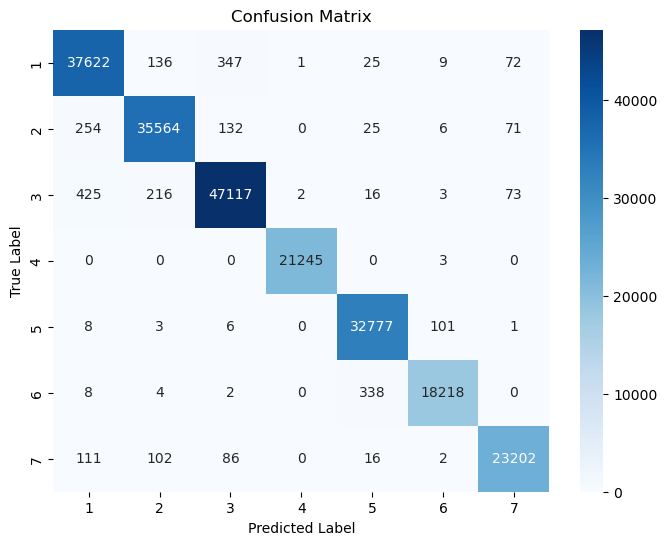

In [ ]:

# Visualize the confusion matrix of the test
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 8), yticklabels=range(1, 8))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()